# 降维与度量学习

当训练集中样本本身的属性维度过高时，要实现密采样条件是很难的（就是针对每个属性，都可以在足够小的 $\delta$ 距离找到足够多的样本）,同时许多学习方法都涉及到距离计算，高维空间的距离计算是很麻烦的，甚至内积计算都不再容易。

事实上，高维情形下出现的数据样本稀疏、距离计算困难等问题，是所有机器学习方法共同面临的严重障碍，被称为“维数灾难”。

**缓解维数灾难的一个重要途径是降维，也叫“维数约简”（另一个重要途径是特征选择），即通过某种数学变换将原始高维属性空间转变为一个低维“子空间”，在这个子空间上样本密度大幅提高，距离计算也变得容易。**

**为什么可以降维？因为很多时候，人们收集到的数据样本虽然是高维的，但与学习任务密切相关的仅是某个低维分布，即高维空间的一个低维“嵌入”。**

## 多维缩放(MDS)

### 问题的提出

如果要求这个数学变换是**保距映射，即样本之间的距离在低维空间得以保持，**就是我们本节要介绍的**多维缩放(Multiple Dimensional Scaling，简称 MDS)**。

给定数据集 $D = \{ (\mathbf{x}_1, y_1), (\mathbf{x}_2, y_2), ... , (\mathbf{x}_m, y_m)\}$ 包含 m 个样本，其中 $ \mathbf{x}_i = (x_{i1}, x_{i2}, ...,x_{id})$ 为 d 维的样本。对应的自变量为 $S = (\mathbf{x}_1, \mathbf{x}_2,...,\mathbf{x}_m)\in R^{d\times m}$。

假设 m 个样本在原始空间的距离矩阵是 

$$\mathbf{D} = (d_{ij})\in R^{m\times m}$$, 

其中$d_{ij} = dist(\mathbf{x}_i,\mathbf{x}_j)$ 是两个样本之间的距离。

我们的目标是**获得降维后的自变量$ S_1 =  (\mathbf{z}_1,\mathbf{z}_2, ... , \mathbf{z}_m)$,
其中 $\mathbf{z}_i = (z_{i1}, z_{i2}, ...,z_{id_1})$ 为 $d_1\; (d_1 \leq d)$ 维度的样本。且**

$$ ||\mathbf{z}_i - \mathbf{z}_j|| = d_{ij}$$

假定 $S_1$ 对应的数据集为 $D_1 = \{ (\mathbf{z}_1, y_1), (\mathbf{z}_2, y_2), ... , (\mathbf{z}_m, y_m)\}$。

也就是说，我们的目标是**寻找一个数学变换使得原来的数据集 $D\in R^{(d+1)\times m}$ 保距离映射到数据集 $D_1\in R^{(d_1+1)\times m}, d_1 \leq d$。**

### 解决思路

令 $\mathbf{B} = \mathbf{S}_1^T \mathbf{S}_1 = (\mathbf{z}_i^T \mathbf{z}_j)\in R^{m\times m}$, 其中 $\mathbf{B}$ 为降维后样本的**内积矩阵**， $b_{ij} = \mathbf{z}_i^T \mathbf{z}_j$，因为这个变换是保距的，所有有

$$\begin{split}
d_{ij}^2 &= ||\mathbf{z}_i - \mathbf{z}_j||^2\\
&= ||\mathbf{z}_i||^2 + ||\mathbf{z}_j||^2 - 2\mathbf{z}_i^T \mathbf{z}_j\\
&= b_{ii}+b_{jj}-2b_{ij}
\end{split}$$

也因此我们有
$$ b_{ij} = -\frac{1}{2}(d_{ij}^2 - b_{ii}-b_{jj}) \tag{MDS-1}$$

**step1. 下面我们先通过原空间的距离矩阵 D 来求解满足保距关系 (MDS-1) 的距离矩阵 B.**

为便于讨论，令降维后的 $\mathbf{S}_1$ 被中心化，即 $\sum_{i=1}^m \mathbf{z}_i = \mathbf{0}$.显然，矩阵 $\mathbf{B}$ 的行/列之和均为0，即 

$$\sum_{i=1}^m b_{ij} = \left(\sum_{i=1}^m \mathbf{z}_i\right)^T \mathbf{z}_j= 0$$

等价地，也有 $\sum_{j=1}^m b_{ij}=0$.

由 (MDS-1) 式可知

$$\sum_{i=1}^m d_{ij}^2 = \sum_{i=1}^m b_{ii} + \sum_{i=1}^m b_{jj} - 2 \sum_{i=1}^m b_{ij}= tr(\mathbf{B}) + m b_{jj} \tag{MDS-2.1}$$

其中，$tr(\cdot)$ 表示矩阵的迹(trace)，$tr(\mathbf{B}) = \sum_{i=1}^m ||\mathbf{z}_i||^2$。

类似地

$$\sum_{j=1}^m d_{ij}^2 = tr(\mathbf{B}) + m b_{ii} \tag{MDS-2.2}$$
$$\sum_{i=1}^m\sum_{j=1}^m d_{ij}^2 = 2m tr(\mathbf{B})\tag{MDS-2.2}$$

令

$$d_{i\cdot}^2 = \frac{1}{m}\sum_{j=1}^m d_{ij}^2 \tag{MDS-3.1}$$

$$d_{\cdot j}^2 = \frac{1}{m}\sum_{i=1}^m d_{ij}^2 \tag{MDS-3.2}$$

$$d_{\cdot\cdot}^2 = \frac{1}{m^2}\sum_{i=1}^m\sum_{j=1}^m d_{ij}^2 \tag{MDS-3.3}$$


由 (MDS-1) 和 MDS-$(2.1\sim 3.3)$ 可得

$$\begin{split}
b_{ij} &= -\frac{1}{2}(d_{ij}^2 - b_{ii}-b_{jj}) \\
&= -\frac{1}{2}\left(d_{ij}^2 - \frac{1}{m}\sum_{i=1}^m d_{ij}^2 -\frac{1}{m}tr(\mathbf{B}) -\frac{1}{m}\sum_{j=1}^m d_{ij}^2 -\frac{1}{m}tr(\mathbf{B})\right)\\
&= -\frac{1}{2}\left(d_{ij}^2 - d_{\cdot j}^2 - d_{i\cdot}^2 - \frac{2}{m}\frac{1}{2m}\sum_{i=1}^m\sum_{j=1}^m d_{ij}^2\right)\\
&= -\frac{1}{2}(d_{ij}^2 - d_{\cdot j}^2 - d_{i\cdot}^2 - d_{\cdot\cdot}^2)
\end{split}\tag{MDS-4}$$

到此为止，我们得到了降维后保持样本之间距离不变的内积矩阵 B。

**step2. 通过内积矩阵 B 求解 $S_1$ 的表达形式。**

对矩阵做特征值分解

$$\mathbf{B} = \mathbf{V}\mathbf{\Lambda}\mathbf{V}^T$$

其中 $\Lambda  = diag(\lambda_1, \lambda_2, ..., \lambda_d)$ 为特征值构成的对角矩阵，$\lambda_1\geq \lambda_2\geq ...,\geq\lambda_d,\; \mathbf{V}$ 为特征向量矩阵。

假定其中有 $d^\ast$ 个非零特征值，构成对角矩阵 $\Lambda_\ast = diag(\lambda_1, \lambda_2, ..., \lambda_{d_\ast})$, 令 $\mathbf{V}_\ast$ 表示相应的特征向量矩阵，则 $S_1$ 可表示为

$$ S_1 = \Lambda_\ast^{1/2}\mathbf{V}_\ast^T \in R^{d^\ast\times m}.$$

到此为止，我们得到了降维后对应的 $S_1$ 的表达形式。

现实应用中，往往只需要降维后的距离与原始空间距离尽可能接近，不要求严格相等。此时可取 $d_1 \ll d$ 个最大特征值构成对角矩阵 $\tilde{\Lambda} = diag(\lambda_1, \lambda_2, ..., \lambda_{d_1})$，令$\tilde{\mathbf{V}}$ 表示相应的特征向量矩阵，则 $S_1$ 可表达为

$$S_1 = \tilde{\Lambda}^{1/2}\tilde{\mathbf{V}}^T \in R^{d_1\times m}.$$

### 算法流程图

下面给出 MDS 的算法流程图：
***
* **输入：** 距离矩阵 $\mathbf{D} = (d_{ij})\in R^{m\times m}$;  低维空间维数 $d_1$.


* **过程：**
    1. 根据式 MDS-$(3.1\sim 3.3)$ 计算 $d_{i\cdot}^2,\; d_{\cdot j}^2,\; d_{\cdot\cdot}^2$;
    2. 根据式 (MDS-4) 计算内积矩阵 $\mathbf{B}$;
    3. 对矩阵 $\mathbf{B}$ 做特征分解；
    4. 取 $\tilde{\Lambda}$ 为 $d_1$ 个最大特征值所构成的对角矩阵， $\tilde{\mathbf{V}}$ 为相应的特征向量矩阵.
    
    
* **输出：** 矩阵 $\tilde{\mathbf{V}}\tilde{\Lambda}^{1/2}\in R^{m\times d_1}$,每行是一个样本的低维坐标($d_1$ 维)

疑问： 输入里的距离矩阵本身在高维空间好求解么？？
***

### [sklearn.manifold.MDS](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.MDS.html)

In [1]:
# 小案例
from sklearn.datasets import load_digits
from sklearn.manifold import MDS
# 加载数据
X, _ = load_digits(return_X_y=True)
X.shape

(1797L, 64L)

In [4]:
embedding = MDS(n_components=2)
X_transformed = embedding.fit_transform(X[:100])
X_transformed.shape

(100L, 2L)

## 主成分分析(PCA)

### 线性降维方法

一般来说，欲获得低维子空间，最简单的是对原始高维空间进行线性变换。给定 d 维空间样本 

$$X = (\mathbf{x}_1, \mathbf{x}_2,...,\mathbf{x}_m)\in R^{d\times m},\; \mathbf{x}_i\in R^{d\times 1}$$

变换之后得到 $d_1 \leq d$ 维空间样本

$$\mathbf{Z} = \mathbf{W}^T \mathbf{X} \tag{PCA-1}$$

其中 
* $\mathbf{W}\in R^{d\times d_1}$ 是变换矩阵，可视为 $d_1$ 个 d 维向量：

     $$\mathbf{W} = (\mathbf{w}_1,\mathbf{w}_2,...,\mathbf{w}_{d_1}),\; \mathbf{w}_i\in R^{d\times 1} $$

* $\mathbf{Z}\in R^{d_1\times m}$ 是样本在新空间中的表达：

$$Z = (\mathbf{z}_1, \mathbf{z}_2,...,\mathbf{z}_m), \; \mathbf{z}_i\in R^{d_1\times 1}$$

由 (PCA-1) 可知

$$\mathbf{z}_i = \mathbf{W}^T \mathbf{x}_i$$

是第 i 个样本与这 $d_1$ 个基向量分别做内积得到的 $d_1$ 维属性向量。

**基于线性变换来进行降维的方法为线性降维方法，都符合 (PCA-1) 的基本形式。** 不同之处在于对低维子空间的性质也就是 $\mathbf{W}$ 有不同的要求，在 PCA 中我们会看到，若要求对低维子空间要求具有最大可分性， 会得到 常用的线性降维方法 PCA.

对降维效果的评估，通常是比较降维前后学习器性能的差异。

### PCA思路

主成分分析(Principal Component Analysis，简称 PCA) 是最常用的一种**无监督线性降维方法**。考虑这样一个问题：

    对于正交属性空间中的样本点，如何用一个超平面对所有的样本进行恰当的表达？

这样的超平面应该具有如下两种性质：

    1. 最近重构性：样本点到这个超平面的距离都足够近；
    2. 最大可分性：样本点到这个超平面的投影尽可能分开。

以上两个性质的侧重点不同：
    
    * 重构性：样本点到正交属性空间的投影样本所在超平面足够近（即投影的损失比较小）；
    * 可分性：正交属性空间超平面上的投影样本的分布应该是散开的。

下面我们会发现通过两种性质会得到 PCA 的等价推导。

<img src='figure/PCA-1.png' width='400' height='300' align='left'>

### 最近重构性

先提出两个假定：
* 假设数据样本进行了中心化，即$ \sum_i \mathbf{x}_i=0$
* 假设投影变换后得到的新坐标系为 
$$\{\mathbf{w}_1,\mathbf{w}_2,...,\mathbf{w}_{d}\}, \quad ||\mathbf{w}_i||_2 = 1, \quad \mathbf{w}_i^T \mathbf{w}_j=0\; (i\neq j)$$也就是说，$\mathbf{w}_i$ 是正交向量。


如果舍弃新坐标系中的部分坐标，将维度降低到 $d_1\leq d$，则样本点 $\mathbf{x}_i$ 在低维坐标系中的投影是 $\mathbf{z}_i\in R^{d_1\times 1}$。由 $\mathbf{z}_i = \mathbf{W}^T \mathbf{x}_i$ 可知

$$\left(                 
\begin{array}{c}   
z_{i1}\\  
\vdots\\
z_{id_1}\\
\end{array} 
\right)
=\mathbf{z}_i = \mathbf{W}^T \mathbf{x}_i
=\left(
\begin{array}{c}   
\mathbf{w}_1^T\\  
\vdots\\
\mathbf{w}_{d_1}^T\\
\end{array} 
\right)\cdot \mathbf{x}_i$$        

所以我们有 $z_{ij} = \mathbf{w}_{j}^T \mathbf{x}_i$，是在低维坐标系下第 j 维的坐标。 记 $\mathbf{x}_i$ 在低维空间的投影样本为 $\hat{\mathbf{x}}_i$,则有 $\hat{\mathbf{x}}_i = \sum_{j=1}^{d_1}z_{ij}\mathbf{w}_{j}$.

针对整个 $\mathbf{X}$ 的样本，考虑原样本点到投影之后的样本点之间的距离为

$$\begin{split}
&\sum_{i=1}^m ||\sum_{j=1}^{d_1}z_{ij}\mathbf{w}_{j}- \mathbf{x}_i||^2\\
=& \sum_{i=1}^m \left( \sum_{n=1}^{d_1}z_{in}\mathbf{w}_{n}- \mathbf{x}_i \right)^T \left(\sum_{m=1}^{d_1}z_{im}\mathbf{w}_{m}- \mathbf{x}_i\right)\\
=& \sum_{i=1}^m \left( \sum_{n=1}^{d_1}\sum_{m=1}^{d_1} z_{in}z_{im}\mathbf{w}_{n}^T\mathbf{w}_{m} - \sum_{n=1}^{d_1}z_{in}\mathbf{w}_{n}^T\mathbf{x}_i - \sum_{m=1}^{d_1}z_{im}\mathbf{x}_i^T\mathbf{w}_{m} + \mathbf{x}_i^T\mathbf{x}_i\right)\\
=& \sum_{i=1}^m \left(\sum_{n=1}^{d_1}z_{in}^2 - 2 \sum_{n=1}^{d_1}z_{in}\mathbf{w}_{n}^T\mathbf{x}_i + ||\mathbf{x}_i||^2\right)\\
=&\sum_{i=1}^m \left(\sum_{n=1}^{d_1}z_{in}^2 - 2 \sum_{n=1}^{d_1}z_{in}^2 + ||\mathbf{x}_i||^2\right)\\
=& -\sum_{i=1}^m \mathbf{z}_{i}^T\mathbf{z}_{i} + \sum_{i=1}^m ||\mathbf{x}_i||^2\\
\propto & \; -tr\left(\mathbf{W}^T\left(\sum_{i=1}^m \mathbf{x}_i \mathbf{x}_i^T\right)\mathbf{W}\right)\\
\propto & --tr\left(\mathbf{W}^T\mathbf{X}\mathbf{X}^T\mathbf{W}\right)
\end{split}\tag{PCA-1.1}$$

备注：
1. $\mathbf{w}_{n}^T\mathbf{x}_i = \mathbf{x}_i^T \mathbf{w}_{n}$
2. 最后一步$\propto$对应的矩阵运算还没弄清楚：
$$\begin{split}
-\sum_{i=1}^m \mathbf{z}_{i}^T\mathbf{z}_{i} 
&= \mathbf{Z}^T \mathbf{Z}\\
&=(\mathbf{W}^T \mathbf{X})^T(\mathbf{W}^T \mathbf{X})\\
&=\mathbf{X}^T\mathbf{W}\mathbf{W}^T \mathbf{X}\\
&=\mathbf{X}^T\mathbf{X}\\
\end{split}$$

如果上面的推导过程是正确的，如何出现上面正比于 tr 的结果呢？

根据最近重构性，（PCA-1.1）应该最小化，考虑到我们的假定2，有

$$\begin{split}
&\min_{\mathbf{W}} \; -tr\left(\mathbf{W}^T\mathbf{X}\mathbf{X}^T\mathbf{W}\right)\\
&s.t. \;\mathbf{W}^T\mathbf{W}=\mathbf{I}
\end{split} \tag{PCA-1.2}$$

### 最大可分性

样本点 $\mathbf{x}_i$ 在低维坐标系中的投影是 $\mathbf{W}^T \mathbf{x}_i$，从最大可分性角度考虑，所有样本点投影后的样本方差最大化。考虑到假设1，中心化的样本的均值是 $\mathbf{0}$，所以对应的方差为 $\sum_{i=1}^m\mathbf{W}^T\mathbf{x}_i \mathbf{x}_i^T\mathbf{W}$，于是优化目标可以写成：

$$\begin{split}
&\max_{\mathbf{W}} \; tr\left(\mathbf{W}^T\mathbf{X}\mathbf{X}^T\mathbf{W}\right)\\
&s.t. \;\mathbf{W}^T\mathbf{W}=\mathbf{I}
\end{split} \tag{PCA-2.1}$$

显然，(PCA-2.1) 和 (PCA-1.2) 等价。

### Lagrange 极值与特征值分解

对(PCA-2.1) 使用 拉格朗日乘子法可得

$$f(\mathbf{W}, \lambda) = -tr\left(\mathbf{W}^T\mathbf{X}\mathbf{X}^T\mathbf{W}\right) + \lambda(\mathbf{W}^T\mathbf{W}-\mathbf{I})$$

由 $\frac{\partial f}{\partial \mathbf{W}} = 0$ 可得（我没有严格推导）

$$\mathbf{X}\mathbf{X}^T\mathbf{W} = \lambda\mathbf{W} $$

于是，只需要对协方差矩阵 $\mathbf{X}\mathbf{X}^T$ 进行**特征值分解**（实践中常通过对 $\mathbf{X}$ 奇异值分解来代替协方差矩阵的特征值分解），将求得的特征值排序：$\lambda_1\leq \lambda_2\leq\cdots\lambda_d$，再取前 $d_1$ 个特征值对应的特征向量构成的 $\{\mathbf{w}_1,\mathbf{w}_2,...,\mathbf{w}_{d_1}\}$，再通过 $\mathbf{Z} = \mathbf{W}^T \mathbf{X}$ 就可以得到降维后的样本集 $\mathbf{Z}$，也就是 PCA 的解。

**$d_1$ 的选取：**

    降维后低维空间的维数 $d_1$ 通常由用户事先指定，或通过在 $d_1$ 值不同的低维空间对 k 近邻分类器（或其他开销较小的学习器）进行交叉验证来选取较好的 $d_1$ 值。对 PCA，还可以从重构的角度设置一个重构阈值，例如 t = 95%，然后选取使下式成立的最小 $d_1$ 值：

$$\frac{\sum_{i=1}^{d_1}\lambda_i}{\sum_{i=1}^{d}\lambda_i}\geq t$$

**降维的优点：**

    低维空间与原始高维空间必有不同，对应于最小的 $d -d_1$ 个特征值的特征向量全被舍弃，这是降维导致的结果。但这样的舍弃往往是必要的：
    1. 舍弃这部分信息之后能使样本的采样密度增大，这正是降维的重要动机；
    2. 当数据受到噪声影响时，最小的特征值所对应的特征向量往往与噪声有关，将它们舍弃能在一定程度上起到去燥的效果。

### 算法流程图

<img src='figure/PCA.png' width='400' height='300' align='left'>

### [sklearn.decomposition.PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

### 案例

注：
* 该 PCA 算法不包含数据预处理部分，需要自己完成，可以通过 [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) 类进行数据预处理。

* [参数及案例](https://www.cnblogs.com/pinard/p/6243025.html)



### 使用 Numpy 模拟 PCA 计算过程

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
A = np.array([[3, 2000], 
              [2, 3000], 
              [4, 5000], 
              [5, 8000], 
              [1, 2000]], dtype='float')

# 数据归一化
mean = np.mean(A, axis=0)
norm = A - mean
# 数据缩放
scope = np.max(norm, axis=0) - np.min(norm, axis=0)
norm = norm / scope
norm

array([[ 0.        , -0.33333333],
       [-0.25      , -0.16666667],
       [ 0.25      ,  0.16666667],
       [ 0.5       ,  0.66666667],
       [-0.5       , -0.33333333]])

In [7]:
# 奇异值分解求特征向量
U, S, V = np.linalg.svd(np.dot(norm.T, norm))
U

array([[-0.67710949, -0.73588229],
       [-0.73588229,  0.67710949]])

In [8]:
# 由于要二维数据降到一维，所以只取特征矩阵的第一列来构造U_reduce
U_reduce = U[:, 0].reshape(2,1)
U_reduce

array([[-0.67710949],
       [-0.73588229]])

In [9]:
#降维
R = np.dot(norm, U_reduce)
R

array([[ 0.2452941 ],
       [ 0.29192442],
       [-0.29192442],
       [-0.82914294],
       [ 0.58384884]])

In [10]:
# 还原数据
Z = np.dot(R, U_reduce.T)
np.multiply(Z, scope) + mean

array([[  2.33563616e+00,   2.91695452e+03],
       [  2.20934082e+00,   2.71106794e+03],
       [  3.79065918e+00,   5.28893206e+03],
       [  5.24568220e+00,   7.66090960e+03],
       [  1.41868164e+00,   1.42213588e+03]])

和原始矩阵 A 对比，会发现数据有一定程度的失真，这是不可避免的。

### 使用 sklearn 进行 PCA 降维运算

 sklearn.decomposition.PCA 实现了 PCA 算法，但不包含数据预处理部分，需要自己完成，可以通过 MinMaxScaler 类进行数据预处理。

In [11]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

def std_PCA(**argv):
    scaler = MinMaxScaler()
    pca = PCA(**argv)
    pipeline = Pipeline([('scaler', scaler),
                         ('pca', pca)])
    return pipeline

pca = std_PCA(n_components=1)
R2 = pca.fit_transform(A)
R2

array([[-0.2452941 ],
       [-0.29192442],
       [ 0.29192442],
       [ 0.82914294],
       [-0.58384884]])

你可能会注意到此处的降维输出与“使用numpy进行PCA降维运算”的结果符号正好相反，这是因为选择的坐标方向不同。

In [12]:
# 数据还原
pca.inverse_transform(R2)

array([[  2.33563616e+00,   2.91695452e+03],
       [  2.20934082e+00,   2.71106794e+03],
       [  3.79065918e+00,   5.28893206e+03],
       [  5.24568220e+00,   7.66090960e+03],
       [  1.41868164e+00,   1.42213588e+03]])

这里逆运算是逐级进行的，先使用 `PCA.inverse_transform()` 进行 PCA 还原，再执行 `MinMaxScaler.inverse_transform()` 进行预处理的逆运算。

**PCA的物理意义**

我们把前面例子中的数据在一个坐标轴上全部画出来，从而仔细观察 PCA 降维过程中的物理含义。 

Text(0.033909,-0.280508,u'projected data')

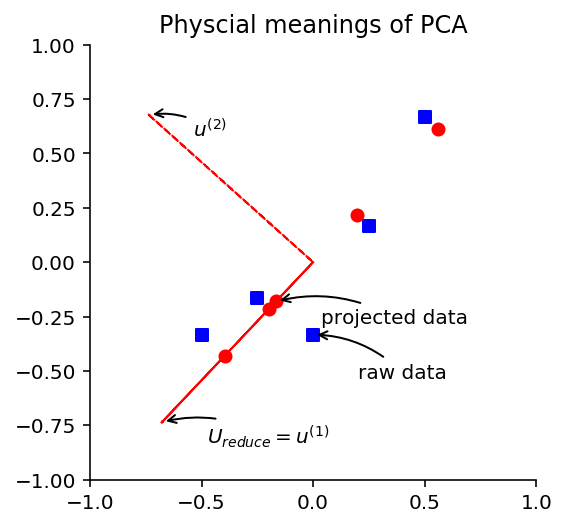

In [14]:
plt.figure(figsize=(4, 4), dpi=144)

plt.title('Physcial meanings of PCA')

ymin = xmin = -1
ymax = xmax = 1
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
ax = plt.gca()                                  # gca 代表当前坐标轴，即 'get current axis'
ax.spines['right'].set_color('none')            # 隐藏坐标轴
ax.spines['top'].set_color('none')

plt.scatter(norm[:, 0], norm[:, 1], marker='s', c='b')
plt.scatter(Z[:, 0], Z[:, 1], marker='o', c='r')
plt.arrow(0, 0, U[0][0], U[1][0], color='r', linestyle='-')
plt.arrow(0, 0, U[0][1], U[1][1], color='r', linestyle='--')
plt.annotate(r'$U_{reduce} = u^{(1)}$',
             xy=(U[0][0], U[1][0]), xycoords='data',
             xytext=(U_reduce[0][0] + 0.2, U_reduce[1][0] - 0.1), fontsize=10,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))
plt.annotate(r'$u^{(2)}$',
             xy=(U[0][1], U[1][1]), xycoords='data',
             xytext=(U[0][1] + 0.2, U[1][1] - 0.1), fontsize=10,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))
plt.annotate(r'raw data',
             xy=(norm[0][0], norm[0][1]), xycoords='data',
             xytext=(norm[0][0] + 0.2, norm[0][1] - 0.2), fontsize=10,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))
plt.annotate(r'projected data',
             xy=(Z[0][0], Z[0][1]), xycoords='data',
             xytext=(Z[0][0] + 0.2, Z[0][1] - 0.1), fontsize=10,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

图中正方形的点是原始数据经过预处理（归一化、缩放）的数据；圆形的点是降维以后的一维数据恢复到二维后的数据；$\mathbf{u}^{(1)},\mathbf{u}^{(2)}$ 是主成分特征向量。可以得到如下结论：

1. 圆形点实际上就是方形点在特征向量 $\mathbf{u}^{(1)}$ 上的**投影**；
2. 所谓 PCA 的数据恢复，并不是真正的恢复，只是把**降维后的坐标转换为原坐标系中的坐标**而已。

### 人脸识别

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

我们使用英国剑桥 AT&T 实验室的研究人员自拍的一组照片，来开发一个特定的人脸识别系统。数据集中包含400张照片的缩略图，来自于40位人员的照片，每个人10张。数据集在目录 datasets/olivetti.pkz 下。

In [16]:
import time
import logging
from sklearn.datasets import fetch_olivetti_faces

logging.basicConfig(level=logging.INFO, format='%(asctime)s %(message)s')

data_home='datasets/'
logging.info('Start to load dataset')
faces = fetch_olivetti_faces(data_home=data_home)
logging.info('Done with load dataset')

2019-01-25 14:26:35,219 Start to load dataset
2019-01-25 14:26:35,255 Done with load dataset


In [17]:
X = faces.data
y = faces.target
targets = np.unique(faces.target)
target_names = np.array(["c%d" % t for t in targets])
n_targets = target_names.shape[0]
n_samples, h, w = faces.images.shape
print('Sample count: {}\nTarget count: {}'.format(n_samples, n_targets))
print('Image size: {}x{}\nDataset shape: {}\n'.format(w, h, X.shape))

Sample count: 400
Target count: 40
Image size: 64x64
Dataset shape: (400L, 4096L)



为了后续区分不同的人物，我们用索引号给目标人物命名，保存在变量 target_names里。为了更直观观察数据，从每个人物照片里随机选择一张显示出来。

In [19]:
# 定义一个函数来显示照片阵列
def plot_gallery(images, titles, h, w, n_row=2, n_col=5):
    """显示图片阵列"""
    plt.figure(figsize=(2 * n_col, 2.2 * n_row), dpi=144)
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.01)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i])
        plt.axis('off')

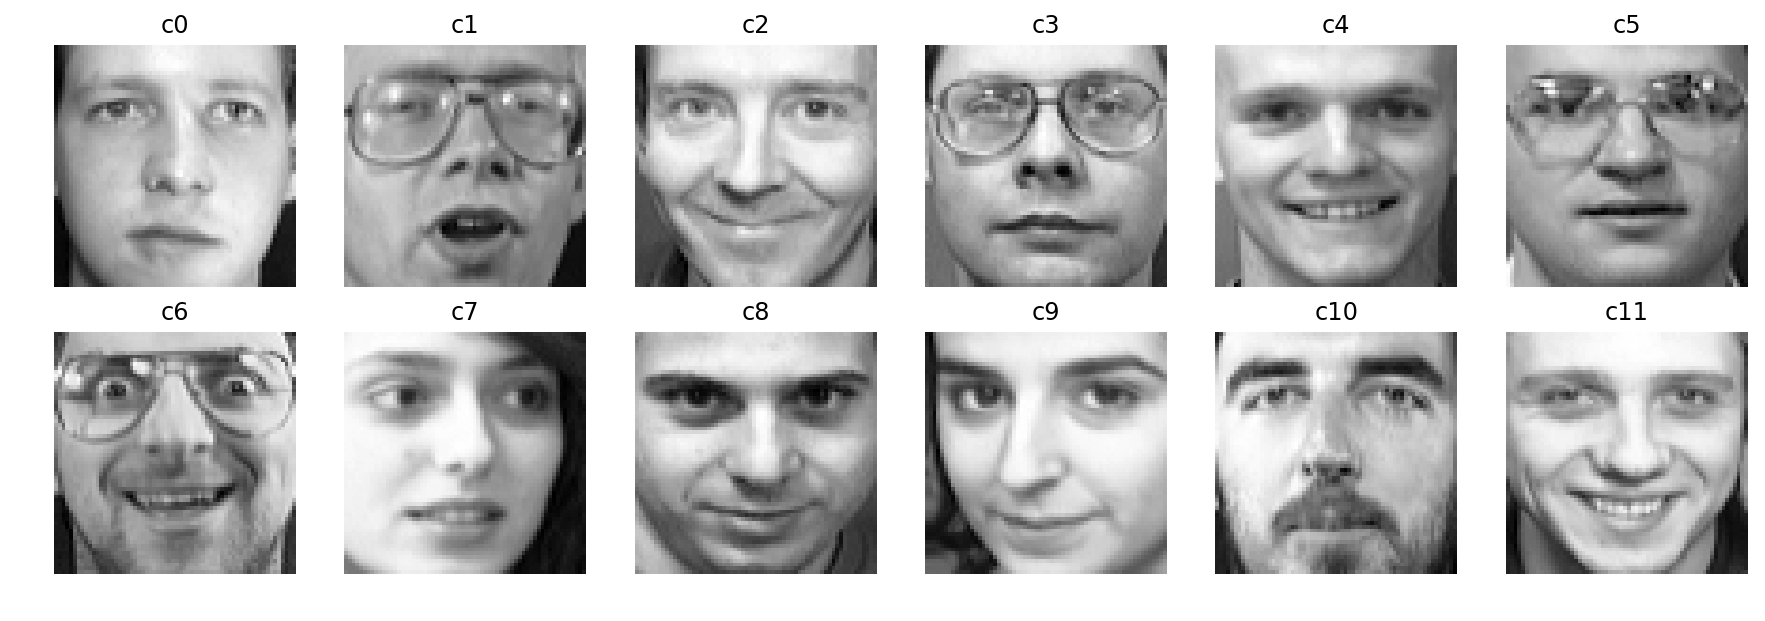

In [20]:
n_row = 2
n_col = 6

sample_images = None
sample_titles = []
for i in range(n_targets):
    people_images = X[y==i]
    people_sample_index = np.random.randint(0, people_images.shape[0], 1)
    people_sample_image = people_images[people_sample_index, :]
    if sample_images is not None:
        sample_images = np.concatenate((sample_images, people_sample_image), axis=0)
    else:
        sample_images = people_sample_image
    sample_titles.append(target_names[i])

plot_gallery(sample_images, sample_titles, h, w, n_row, n_col)

In [21]:
# 数据集分成训练集和测试集
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=4)

**一次失败的尝试**

In [22]:
# 我们使用 SVC 来实现人脸识别
from sklearn.svm import SVC

start = time.clock()
print('Fitting train datasets ...')
clf = SVC(class_weight='balanced')
clf.fit(X_train, y_train)
print('Done in {0:.2f}s'.format(time.clock()-start))

Fitting train datasets ...


c:\python27\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Done in 1.02s


In [23]:
# 针对测试集进行预测：
start = time.clock()
print("Predicting test dataset ...")
y_pred = clf.predict(X_test)
print('Done in {0:.2f}s'.format(time.clock()-start))

Predicting test dataset ...
Done in 0.18s


In [24]:
# 我们来看模型分类的准确性

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred, labels=range(n_targets))
print("confusion matrix:\n")
np.set_printoptions(threshold=np.nan)
print(cm)

confusion matrix:

[[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0
  0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
  0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
  0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

confusion_matrix 理想的输出是矩阵的对角线上有数字，其他地方没有。但我们的结果不是这样子的，很多图片被预测成索引为12的类别了。我们再看一下 classification_report 的结果。

In [25]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

          c0       0.00      0.00      0.00         1
          c1       0.00      0.00      0.00         3
          c2       0.00      0.00      0.00         2
          c3       0.00      0.00      0.00         1
          c4       0.00      0.00      0.00         1
          c5       0.00      0.00      0.00         1
          c6       0.00      0.00      0.00         4
          c7       0.00      0.00      0.00         2
          c8       0.00      0.00      0.00         4
          c9       0.00      0.00      0.00         2
         c10       0.00      0.00      0.00         1
         c11       0.00      0.00      0.00         0
         c12       0.00      0.00      0.00         4
         c13       0.00      0.00      0.00         4
         c14       0.00      0.00      0.00         1
         c15       0.00      0.00      0.00         1
         c16       0.00      0.00      0.00         3
         c17       0.00    

c:\python27\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\python27\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


40个类别里，查准率、召回率、F1 Score 全为0，不能有更差的预测结果了。原因在于：

    我们把每个像素都作为一个输入特征来处理，这样的数据噪声太严重了，模型根本没有办法对训练数据进行拟合。我们总共有 `64*64=4096` 个特征，数据集大小才400个，比特征个数还少，而且我们还需要把数据集分出 20% 来作为测试数据集，这样训练数据集就更小了。这样的状况下，模型根本无法进行准确地训练和预测。

**使用 PCA 来处理数据集**

在 sklearn 里， PCA 模型的 `explained_variance_ratio_` 变量里可以获取经 PCA 处理后的各个主成分对应的数据还原率。这是一个数组，所有元素求和就是我们选择的 k 个主成分的数据还原率（也就是我们之前提到的“重构阈值”），数值越大说明失真越小，随着 k 的增大，数值会无限接近于1.

我们让 k 取值 10-300 之间，每隔30进行一次取样。在所有的 k 值样本下，计算 PCA 处理之后的数据还原率。然后根据还原率要求来确定 k 值。针对我们的情况，选择重构阈值为 95%，即保留 95% 的原数据信息。 

In [26]:
from sklearn.decomposition import PCA

print("Exploring explained variance ratio for dataset ...")
candidate_components = range(10, 300, 30)
explained_ratios = []
start = time.clock()
for c in candidate_components:
    pca = PCA(n_components=c)
    X_pca = pca.fit_transform(X)
    explained_ratios.append(np.sum(pca.explained_variance_ratio_))
print('Done in {0:.2f}s'.format(time.clock()-start))

Exploring explained variance ratio for dataset ...
Done in 3.48s


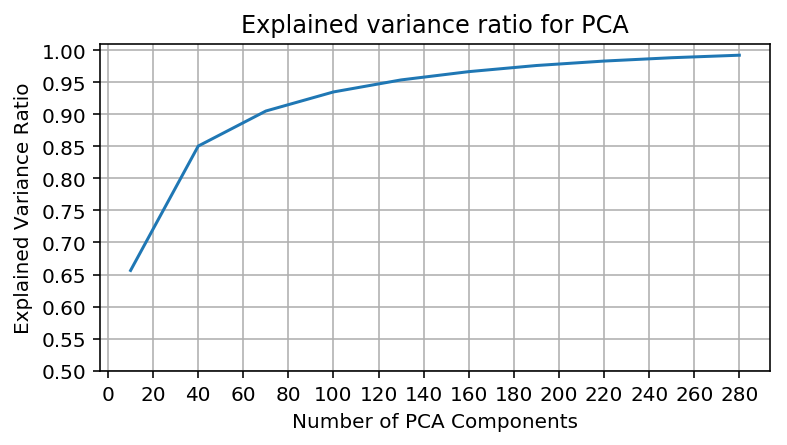

In [31]:
# 画出随着 k 值变化对应的还原率的变化曲线
plt.figure(figsize=(6,3), dpi=144)
plt.grid()
plt.plot(candidate_components, explained_ratios)
plt.xlabel('Number of PCA Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained variance ratio for PCA')
plt.yticks(np.arange(0.5, 1.05, .05))
plt.xticks(np.arange(0, 300, 20));

从图中可以看出，要满足保留 95% 的还原率，k 值选择 140 即可。为了更直观观察和对比不同数据还原率下的数据，我们选择数据还原率分别在 95%、90%、80%、70%、60% 的情况下，画出经 PCA 处理过的照片。从上图看出，这些数据还原率对应的 k 值分别是 140、75、37、19、8。

In [32]:
def title_prefix(prefix, title):
    return "{}: {}".format(prefix, title)

Fitting and projecting on PCA(n_components=140) ...
Done in 0.59s
Fitting and projecting on PCA(n_components=75) ...
Done in 0.15s
Fitting and projecting on PCA(n_components=37) ...
Done in 0.27s
Fitting and projecting on PCA(n_components=19) ...
Done in 0.13s
Fitting and projecting on PCA(n_components=8) ...
Done in 0.09s
Plotting sample image with different number of PCA conpoments ...


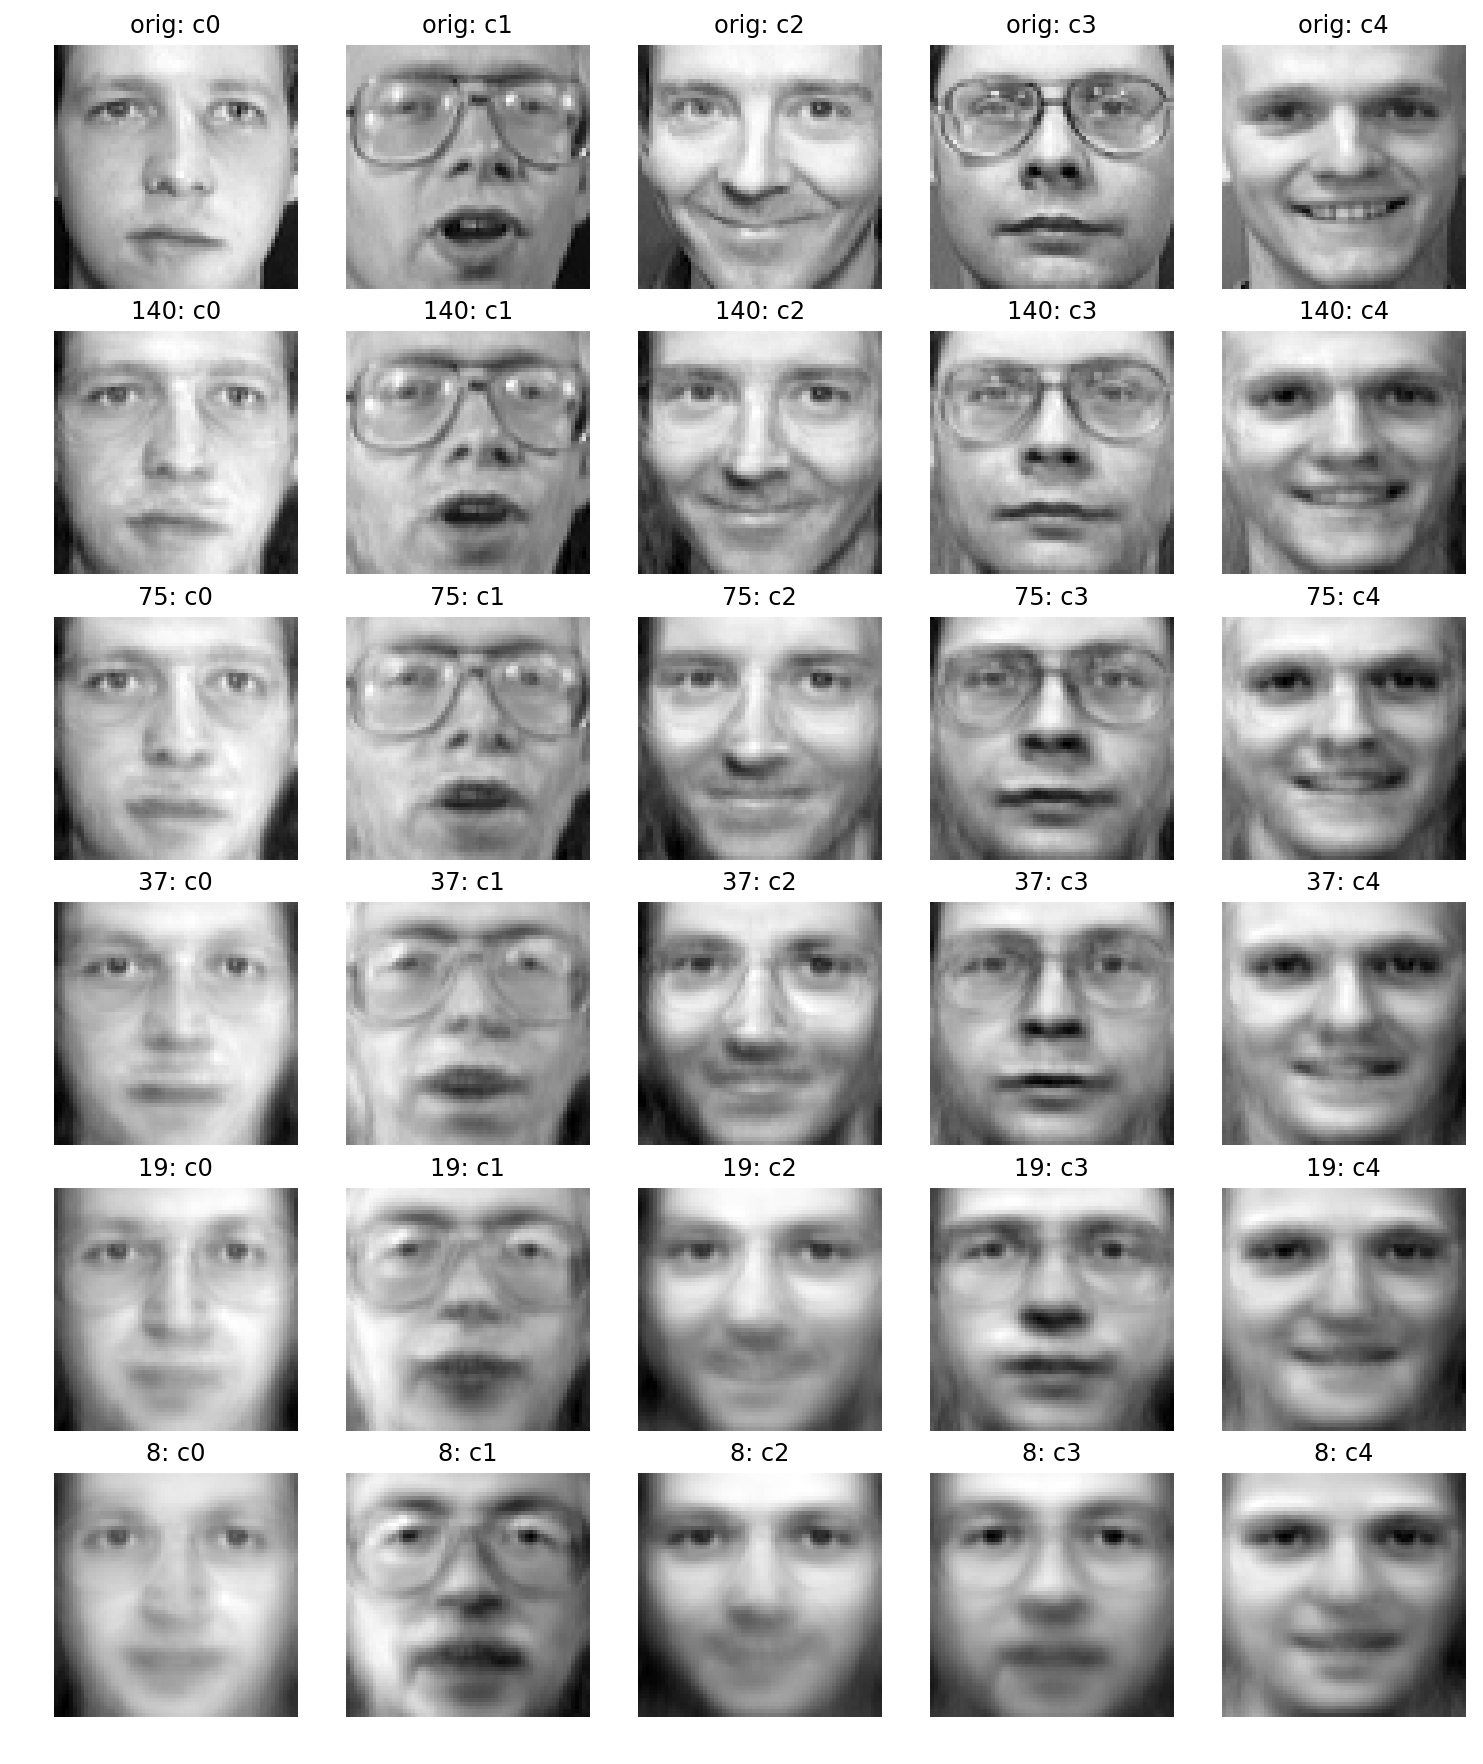

In [33]:
n_row = 1
n_col = 5

sample_images = sample_images[0:5]
sample_titles = sample_titles[0:5]

plotting_images = sample_images
plotting_titles = [title_prefix('orig', t) for t in sample_titles]
candidate_components = [140, 75, 37, 19, 8]
for c in candidate_components:
    print("Fitting and projecting on PCA(n_components={}) ...".format(c))
    start = time.clock()
    pca = PCA(n_components=c)
    pca.fit(X)
    X_sample_pca = pca.transform(sample_images)
    X_sample_inv = pca.inverse_transform(X_sample_pca)
    plotting_images = np.concatenate((plotting_images, X_sample_inv), axis=0)
    sample_title_pca = [title_prefix('{}'.format(c), t) for t in sample_titles]
    plotting_titles = np.concatenate((plotting_titles, sample_title_pca), axis=0)
    print("Done in {0:.2f}s".format(time.clock() - start))

print("Plotting sample image with different number of PCA conpoments ...")
plot_gallery(plotting_images, plotting_titles, h, w,
    n_row * (len(candidate_components) + 1), n_col)

上面6组照片分别显示了原图以及 k 值依次递减的五位成员的照片。

**最终结果**

接下来我们选择 k=140 作为 PCA 参数，对训练数据集和测试数据集进行特征提取。

In [34]:
n_components = 140

print("Fitting PCA by using training data ...")
start = time.clock()
pca = PCA(n_components=n_components, svd_solver='randomized', whiten=True).fit(X_train)
print("Done in {0:.2f}s".format(time.clock() - start))

print("Projecting input data for PCA ...")
start = time.clock()
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("Done in {0:.2f}s".format(time.clock() - start))

Fitting PCA by using training data ...
Done in 0.77s
Projecting input data for PCA ...
Done in 0.06s


In [35]:
# 使用 GridSerchCV 进行矩阵式搜索调参
from sklearn.model_selection import GridSearchCV

print("Searching the best parameters for SVC ...")
param_grid = {'C': [1, 5, 10, 50, 100],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01]}
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid, verbose=2, n_jobs=4)
clf = clf.fit(X_train_pca, y_train)
print("Best parameters found by grid search:")
print(clf.best_params_)

Searching the best parameters for SVC ...
Fitting 3 folds for each of 25 candidates, totalling 75 fits


c:\python27\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    4.5s


Best parameters found by grid search:
{'C': 5, 'gamma': 0.001}


[Parallel(n_jobs=4)]: Done  75 out of  75 | elapsed:    5.8s finished
c:\python27\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [36]:
# 使用这一模型对测试样本进行测试
start = time.clock()
print("Predict test dataset ...")
y_pred = clf.best_estimator_.predict(X_test_pca)
cm = confusion_matrix(y_test, y_pred, labels=range(n_targets))
print("Done in {0:.2f}.\n".format(time.clock()-start))
print("confusion matrix:")
np.set_printoptions(threshold=np.nan)
print(cm)

Predict test dataset ...
Done in 0.01.

confusion matrix:
[[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0]
 [1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0]
 [0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0]
 [0 0 0 0 0 0 3 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0]
 [0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0]
 [0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0]
 [0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0]
 [0 0 0

从输出的对角线上的数据可以看出，大部分预测结果正确。我们再看一下分类报告。

In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.67      0.80         3
           2       1.00      0.50      0.67         2
           3       1.00      1.00      1.00         1
           4       0.50      1.00      0.67         1
           5       1.00      1.00      1.00         1
           6       1.00      0.75      0.86         4
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         4
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         1
          12       0.80      1.00      0.89         4
          13       1.00      1.00      1.00         4
          14       1.00      1.00      1.00         1
          15       1.00      1.00      1.00         1
          16       1.00      1.00      1.00         3
          17       1.00      1.00      1.00         2
          18       1.00    

在总共400张图片，每位目标人物只有10张图片的情况下，测准率和召回率平均达到了0.95以上，一个很高的性能。

## 核主成分分析(KPCA)

### 基本思想

上面的PCA 属于线性降维方法，但不少现实任务中需要**非线性映射**才能找到恰当的低维嵌入。非线性降维的一种常用方法，是基于**核技巧**对线性降维方法进行“核化”。下面我们以核主成分分析(Kernelized PCA，简称 KPCA)为例进行演示(**这种方法的本质是先把待降维的数据通过非线性映射升维然后再通过PCA求解**)。

为了对“原本采样的”低维空间与降维后的低维空间加以区别，我们称前者为“本真”低维空间。

假定我们将在高维特征空间中把数据投影到由 $\mathbf{W}$ 确定的超平面上,假设 $\mathbf{s}_i$ 是样本点 $\mathbf{x}_i$ 在高维特征空间中的像,PCA 欲求解

$$\left(\sum_{i=1}^m\mathbf{s}_i \mathbf{s}_i^T\right)\mathbf{W} = \lambda \mathbf{W}\tag{KPCA-1}$$

易知

$$\begin{split}
\mathbf{W} &= \frac{1}{\lambda}\left(\sum_{i=1}^m\mathbf{s}_i \mathbf{s}_i^T\right)\mathbf{W}
=\sum_{i=1}^m \mathbf{s}_i\frac{\mathbf{s}_i^T\mathbf{W}}{\lambda}\\
&= \sum_{i=1}^m \mathbf{s}_i \mathbf{\alpha}_i
\end{split}\tag{KPCA-2}$$

其中 $\mathbf{\alpha}_i = \frac{1}{\lambda}\mathbf{s}_i^T\mathbf{W}$.

假定 $\mathbf{s}_i$ 由原始属性空间的样点 $\mathbf{x}_i$ 通过映射 $\phi$ 产生，即 $\mathbf{s}_i = \phi(\mathbf{x}_i), 1\leq i\leq m$.如果 $\phi$ 可以被显式表示出来，则通过它将样本映射到高维特征空间，再在特征空间中实施 PCA 即可。

式 (KPCA-1) 可变换为

$$\left(\sum_{i=1}^m\phi(\mathbf{x}_i)\phi(\mathbf{x}_i)^T\right)\mathbf{W} = \lambda \mathbf{W}\tag{KPCA-3}$$

式 (KPCA-2) 可变换为

$$\mathbf{W}= \sum_{i=1}^m \phi(\mathbf{x}_i) \mathbf{\alpha}_i\tag{KPCA-4}$$

一般情况下，我们不清楚 $\phi$ 的具体形式，于是引入核函数

$$k(\mathbf{x}_i, \mathbf{x}_j)=\phi(\mathbf{x}_i)^T\phi(\mathbf{x}_i)\tag{KPCA-5}$$

将 (KPCA-4) 和 (KPCA-5) 带入 (KPCA-3) 可得

$$\begin{split}
&\left(\sum_{i=1}^m\phi(\mathbf{x}_i)\phi(\mathbf{x}_i)^T\right)\left(\sum_{j=1}^m \phi(\mathbf{x}_j) \mathbf{\alpha}_j\right) = \lambda \left(\sum_{i=1}^m \phi(\mathbf{x}_i) \mathbf{\alpha}_i\right)\\
\Rightarrow 
& \sum_{i=1}^m\phi(\mathbf{x}_i) \sum_{j=1}^m \phi(\mathbf{x}_i)^T\phi(\mathbf{x}_j)\mathbf{\alpha}_j = \sum_{i=1}^m \phi(\mathbf{x}_i) \lambda\mathbf{\alpha}_i\\
\Rightarrow 
&\sum_{i=1}^m\phi(\mathbf{x}_i)\left( \sum_{j=1}^m \phi(\mathbf{x}_i)^T\phi(\mathbf{x}_j)\mathbf{\alpha}_j- \lambda\mathbf{\alpha}_i\right) = 0\\
\Rightarrow 
& \sum_{j=1}^m \phi(\mathbf{x}_i)^T\phi(\mathbf{x}_j)\mathbf{\alpha}_j- \lambda\mathbf{\alpha}_i = 0\quad (if \; \phi(\mathbf{x}_i) > 0, \;1\leq i\leq m)\\
\Rightarrow 
& (k_{i1}, k_{i2}, \cdots k_{im})
\left(\begin{array}
\mathbf{\alpha}_1\\
\vdots\\
\mathbf{\alpha}_m
\end{array}\right) = \lambda \mathbf{\alpha}_i
\end{split}\tag{KPCA-6}$$

记 $\mathbf{K}$ 为 k 对应的核矩阵以及

$$(\mathbf{K})_{ij} = k(\mathbf{x}_i,\mathbf{x}_j), \mathbf{A} = \left(\begin{array}
\mathbf{\alpha}_1\\
\vdots\\
\mathbf{\alpha}_m
\end{array}\right)$$

则 (KPCA-6) 可简化为 
$$\mathbf{K}\mathbf{A} = \lambda \mathbf{A}$$

显然，上式属于特征值分解问题，取 $\mathbf{K}$ 最大的 $d_1$ 个特征值对应的特征向量即可。

对新样本 $\mathbf{x}_u$,其投影后的第 $j(j=1,2,\cdots, d_1)$ 维坐标为

$$\begin{split}
\mathbf{s}_{ju} 
&= \mathbf{w}_j^T\phi(\mathbf{x}_u)\\
&= \sum_{i=1}^{m}\alpha_i^j\phi(\mathbf{x}_i)^T\phi(\mathbf{x}_u)\\
&= \sum_{i=1}^{m}\alpha_i^j k(\mathbf{x}_i, \mathbf{x}_u)
\end{split}$$

其中 $\mathbf{\alpha}_i$ 已经经过规范化，$\alpha_i^j$ 是 $\mathbf{\alpha}_i$ 的第 j 个分量。通过上式可知，为获得投影后的坐标， KPCA 需要对所有样本求和，因此计算开销较大。

### [sklearn.decomposition.KernelPCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html#sklearn.decomposition.KernelPCA)

### [sklearn.decomposition.SparsePCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.SparsePCA.html#sklearn.decomposition.SparsePCA)

## 线性判别分析(LDA)

线性判别分析(Linear Discriminant Analysis, 简称 LDA)是一个常用的**有监督线性降维方法**。

### LDA 思想

LDA 的思想非常朴素：

    1. 类别监督降维：给定训练样例集，设法将样例投影到一条直线上，使得同类样例投影点尽可能接近、异类样例投影点尽可能远离；
    2.在对新样本进行分类时，将其投影到根据训练集所得到的降维后的直线上，再根据投影点的位置来确定新样本的类别。

<img src='figure/LDA.png' width='400' height='300' align='left'>

### LDA 数学模型

以二分类问题为例进行讨论。

给定数据集 $D = \{(\mathbf{x}_i ,y_i)\}_{i=1}^m \; y_i\in \{0,1\}$， 令 $\mathbf{X}_i$、$\mathbf{\mu}_i$、$\mathbf{\sum}_i$ 分别表示第 $i\in \{0,1\}$ 类示例的集合、均值向量、协方差矩阵。

* 两类数据的均值向量在直线 $y = \mathbf{w}^T\mathbf{x}$ 上的投影分别是 $\mathbf{w}^T\mathbf{\mu}_0$ 和 $\mathbf{w}^T\mathbf{\mu}_1$；
* 若将所有的样本点都投影到直线上，则两类样本的协方差分别为 $\mathbf{w}^T\mathbf{\sum}_0\mathbf{w}$ 和 $\mathbf{w}^T\mathbf{\sum}_1\mathbf{w}$.

由于直线是一维空间，因此  $\mathbf{w}^T\mathbf{\mu}_0$、$\mathbf{w}^T\mathbf{\mu}_1$、 $\mathbf{w}^T\mathbf{\sum}_0\mathbf{w}$、$\mathbf{w}^T\mathbf{\sum}_1\mathbf{w}$ 均为实数。

1. 为了使同类样例的投影点尽可能接近，可以让同类样例投影点的协方差尽可能小，即

$$ \mathbf{w}^T\mathbf{\sum}_0\mathbf{w}+\mathbf{w}^T\mathbf{\sum}_1\mathbf{w}$$尽可能小；

2. 欲使异类样例的投影点尽可能远离，可以让类中心之间的距离尽可能大，即 

$$||\mathbf{w}^T\mathbf{\mu}_0-\mathbf{w}^T\mathbf{\mu}_1||^2_2$$

尽可能大（**其实本质上是定义两个集合的距离，可以类似聚类章节，采用其他的方式来定义**）。

同时考虑以上两点，则可以得到最大化目标

$$\mathbf{J} = \frac{||\mathbf{w}^T\mathbf{\mu}_0-\mathbf{w}^T\mathbf{\mu}_1||^2_2}{\mathbf{w}^T\mathbf{\sum}_0\mathbf{w}+\mathbf{w}^T\mathbf{\sum}_1\mathbf{w}}$$

假设 $\mathbf{a}^T\mathbf{b}$ 是实数，则有

$$||\mathbf{a}^T\mathbf{b}||^2 = (\mathbf{a}^T\mathbf{b})^T\cdot (\mathbf{a}^T\mathbf{b}) = (\mathbf{a}^T\mathbf{b})\cdot (\mathbf{a}^T\mathbf{b})^T$$

因此

$$\begin{split}
\mathbf{J} &= \frac{||\mathbf{w}^T(\mathbf{\mu}_0-\mathbf{\mu}_1)||^2_2}{\mathbf{w}^T(\mathbf{\sum}_0+\mathbf{\sum}_1)\mathbf{w}}\\
&= \frac{\mathbf{w}^T(\mathbf{\mu}_0-\mathbf{\mu}_1)\left(\mathbf{w}^T(\mathbf{\mu}_0-\mathbf{\mu}_1)\right)^T}{\mathbf{w}^T(\mathbf{\sum}_0+\mathbf{\sum}_1)\mathbf{w}}\\
&=\frac{\mathbf{w}^T(\mathbf{\mu}_0-\mathbf{\mu}_1)(\mathbf{\mu}_0-\mathbf{\mu}_1)^T\mathbf{w}}{\mathbf{w}^T(\mathbf{\sum}_0+\mathbf{\sum}_1)\mathbf{w}}\\
\end{split}\tag{LDA-1}$$

* 定义**“类内散度矩阵”:**

$$ \mathbf{S}_w = \mathbf{\sum}_0+\mathbf{\sum}_1 = \sum_{\mathbf{x}\in \mathbf{X}_0}(\mathbf{x}-\mathbf{\mu}_0)(\mathbf{x}-\mathbf{\mu}_0)^T + \sum_{\mathbf{x}\in \mathbf{X}_1}(\mathbf{x}-\mathbf{\mu}_1)(\mathbf{x}-\mathbf{\mu}_1)^T $$

* 定义**“类间散度矩阵”:**

$$\mathbf{S}_b = (\mathbf{\mu}_0-\mathbf{\mu}_1)(\mathbf{\mu}_0-\mathbf{\mu}_1)^T$$

则 (LDA-1) 可以改写为：

$$\mathbf{J} = \frac{\mathbf{w}^T\mathbf{S}_b\mathbf{w}}{\mathbf{w}^T\mathbf{S}_w\mathbf{w}}\tag{LDA-2}$$

这就是 LDA 欲最大化的目标，即 $\mathbf{S}_b$ 与 $\mathbf{S}_w$ 的“[广义瑞利商](https://www.cnblogs.com/pinard/p/6244265.html)”。

### Lagrange 极值

如何确定 $\mathbf{w}$ 呢？注意到 (LDA-2) 的分子和分母都是关于 $\mathbf{w}$ 的二次项，所以式 (LDA-2) 的解与 $\mathbf{w}$ 长度无关，只和方向相关。不失一般性，令 $\mathbf{w}^T\mathbf{S}_w\mathbf{w}=1$，则式 (LDA-2) 等价于

$$\begin{split}
&\min_{\mathbf{w}} \; -\mathbf{w}^T\mathbf{S}_b\mathbf{w}\\
&s.t. \;\mathbf{w}^T\mathbf{S}_w\mathbf{w}=1
\end{split} \tag{LDA-3}$$

对(LDA-3) 使用拉格朗日乘子法可得

$$f(\mathbf{w}, \lambda) = -\mathbf{w}^T\mathbf{S}_b\mathbf{w} + \lambda(\mathbf{w}^T\mathbf{S}_w\mathbf{w}-1)$$

由 $\frac{\partial f}{\partial \mathbf{w}} = 0$ 可得（我没有严格推导）

$$\mathbf{S}_b\mathbf{w} = \lambda\mathbf{S}_w\mathbf{w} \tag{LDA-4}$$

注意到 
$$\begin{split}
\mathbf{S}_b\mathbf{w} &= (\mathbf{\mu}_0-\mathbf{\mu}_1)(\mathbf{\mu}_0-\mathbf{\mu}_1)^T\mathbf{w}\\
&= (\mathbf{\mu}_0-\mathbf{\mu}_1)\left(\mathbf{w}^T(\mathbf{\mu}_0-\mathbf{\mu}_1)\right)^T\\
&=C(\mathbf{\mu}_0-\mathbf{\mu}_1)
\end{split}$$ 

其中 C 是常数。

所以 $\mathbf{S}_b\mathbf{w}$ 的方向恒为 $\mathbf{\mu}_0-\mathbf{\mu}_1$,不妨令 $C = \lambda$，则有

$$\mathbf{S}_b\mathbf{w} =\lambda(\mathbf{\mu}_0-\mathbf{\mu}_1)$$

带入 (LDA-4) 可得

$$\mathbf{w} = \mathbf{S}_w^{-1}(\mathbf{\mu}_0-\mathbf{\mu}_1)$$.

考虑到数值解的稳定性（？）,在实践中通常是对 $\mathbf{S}_w$ 进行奇异值分解，即 $\mathbf{S}_w = \mathbf{U}\sum^{-1}\mathbf{V}^T$，这里 $\sum$ 是一个对角矩阵，对角线上的元素是 $\mathbf{S}_w$ 的奇异值，然后再由  $\mathbf{S}_w^{-1} = \mathbf{V}\sum^{-1}\mathbf{U}^T$.

值得一提的是，**LDA 可以从贝叶斯决策理论的角度来阐释，并可证明，当两个类别的数据同先验、满足高斯分布且协方差相等时， LDA 可以达到最优分类。**

### [sklearn.lda.LDA](https://scikit-learn.org/0.16/modules/generated/sklearn.lda.LDA.html#sklearn.lda.LDA)

### LDA 多分类情形

可以将 LDA 推广到多分类任务。假定存在 N 个类，且第 i 类示例数为 $m_i$，我们先定义“全局散度矩阵”

$$ \mathbf{S}_t = \sum_{i=1}^m (\mathbf{x}_i-\mathbf{\mu})(\mathbf{x}_i-\mathbf{\mu})^T$$

其中 $\mu$ 是所有示例的均值向量。

将类内散度矩阵 $\mathbf{S}_w$ 重新定义为每个类别的散度矩阵之和，即

$$\mathbf{S}_w = \sum_{i=1}^N \mathbf{S}_{w_i}$$

其中

$$\mathbf{S}_{w_i} = \sum_{\mathbf{x}\in \mathbf{X}_i}(\mathbf{x}-\mathbf{\mu}_i)(\mathbf{x}_i-\mathbf{\mu}_i)^T$$

定义 $\mathbf{S}_b$ 为

$$\begin{split}
\mathbf{S}_b &= \mathbf{S}_t - \mathbf{S}_w\\
& = \sum_{i=1}^N\sum_{\mathbf{x}\in \mathbf{X}_i} (\mathbf{x}-\mathbf{\mu})(\mathbf{x}-\mathbf{\mu})^T - \sum_{i=1}^N\sum_{\mathbf{x}\in \mathbf{X}_i}(\mathbf{x}-\mathbf{\mu}_i)(\mathbf{x}_i-\mathbf{\mu}_i)^T\\
&=\sum_{i=1}^N\sum_{\mathbf{x}\in \mathbf{X}_i}(\mathbf{x}\mathbf{x}^T - \mathbf{x}\mathbf{\mu}^T - \mathbf{\mu}\mathbf{x}^T + \mathbf{\mu}\mathbf{\mu}^T - \mathbf{x}\mathbf{x}^T + \mathbf{x}\mathbf{\mu}^T_i -\mathbf{\mu}_i\mathbf{x}^T + \mathbf{\mu}_i\mathbf{\mu}_i^T)\\
&=\sum_{i=1}^N\sum_{\mathbf{x}\in \mathbf{X}_i}(- \mathbf{x}\mathbf{\mu}^T - \mathbf{\mu}\mathbf{x}^T + \mathbf{\mu}\mathbf{\mu}^T + \mathbf{x}\mathbf{\mu}^T_i -\mathbf{\mu}_i\mathbf{x}^T + \mathbf{\mu}_i\mathbf{\mu}_i^T)\\
&=\sum_{i=1}^N(- m_i\mathbf{\mu}_i\mathbf{\mu}^T - m_i\mathbf{\mu}\mathbf{\mu}_i^T + m_i\mathbf{\mu}\mathbf{\mu}^T + m_i\mathbf{\mu}_i\mathbf{\mu}_i^T - m_i\mathbf{\mu}_i\mathbf{\mu}_i^T + m_i\mathbf{\mu}_i\mathbf{\mu}_i^T)\\
&=\sum_{i=1}^N m_i(-\mathbf{\mu}_i\mathbf{\mu}^T - \mathbf{\mu}\mathbf{\mu}_i^T + \mathbf{\mu}\mathbf{\mu}^T + \mathbf{\mu}_i\mathbf{\mu}_i^T)\\
&=\sum_{i=1}^N m_i(\mathbf{\mu}_i-\mathbf{\mu})(\mathbf{\mu}_i-\mathbf{\mu})^T
\end{split}$$

显然，多分类 LDA 可以有多种实现方法： 使用 $\mathbf{S}_b,\mathbf{S}_w,\mathbf{S}_t$ 三者中的任何两个即可。常见的一种实现是采用优化目标

$$\max_{\mathbf{W}}\frac{tr(\mathbf{W}^T \mathbf{S}_b \mathbf{W})}{tr(\mathbf{W}^T \mathbf{S}_w \mathbf{W})}\tag{LDA-5}$$

其中 $\mathbf{W}\in R^{d\times (N-1)}, tr(\cdot)$ 表示矩阵的迹。

式(LDA-5) 可通过如下广义特征值问题求解：

$$\mathbf{S}_b \mathbf{W} = \lambda \mathbf{S}_w \mathbf{W}$$

$\mathbf{W}$ 的闭式解则是 $\mathbf{S}_w^{-1}\mathbf{S}_b$ 的 N-1 个最大广义特征值所对应的特征向量组成的矩阵。

若将 $\mathbf{W}$ 视为一个投影矩阵，则多分类 LDA 将样本投影到 N-1 维空间， N-1 通常远小于数据原有的属性数（为了提高样本密度）。于是，可以通过投影来减少样本点的维数，且投影过程中使用了类别信息，因此 LDA 也常被视为一种经典的监督降维技术。

## 流形学习

“流形”是微分几何里的概念，简单来讲，是指在局部与欧式空间通胚的空间。给降维方法带来的启发是：

    若低维流形嵌入到高维空间中，则数据样本在高维空间的分布虽然看上去非常复杂，但在局部上仍具有欧式空间的性质，因此，可以容易地在局部建立降维映射关系，再设法将局部映射关系推广到全局。

### 等度量映射（Isomap）

等度量映射的基本出发点是：

    任务低维流形嵌入到高维空间后，直接在高维空间中计算直线距离具有误导性，因为高维空间中的直线距离在低维嵌入流形是不可达的。低维嵌入流形两点间的距离是“测地线”距离。
    
    通过“在局部上与欧式空间同胚”的性质，对每个点在基于欧式距离找出其近邻点，然后建立起一个近邻连接图，近邻点之间存在连接，非近邻点之间不存在连接。于是，计算两点之间测地线距离的问题，转变为计算近邻连接图上两点之间最短路径问题。在得到任意两点的距离后，就可以通过上面介绍的 MDS 来获得样本点在低维空间中的坐标。

具体再详细的部分请参看周志华的《机器学习》第10章。对应的sklearn 包为 [sklearn.manifold.Isomap](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.Isomap.html#sklearn.manifold.Isomap)

### 局部线性嵌入（Locally Linear Embedding，简称 LLE）

与 Isomap 试图保持近邻样本之间的距离不同，局部线性嵌入**试图保持邻域内样本之间的线性关系（相当于说，在流形的局部我们假设样本的邻域是一个超平面，这个是微分里以直代曲的思想）**。

具体再详细的部分请参看周志华的《机器学习》第10章。对应的sklearn 包为 [sklearn.manifold.LocallyLinearEmbedding](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.LocallyLinearEmbedding.html#sklearn.manifold.LocallyLinearEmbedding)

## 度量学习

度量学习的基本动机：

    机器学习里，对高维数据进行降维的主要目的是希望找到一个合适的低维空间，在此空间中进行学习能比原始空间性能更好。事实上，**每个空间对应了在样本属性上定义的一个距离度量，寻找合适的空间，实质上就是寻找一个合适的距离度量。**

    那么，为何不直接尝试“学习”出一个合适的距离度量呢？

欧式距离的前提是，坐标轴是正交的，属性之间是不相关的。我们打破这两点，定义如下的马氏距离：

$$dist_{mah}^2(\mathbf{x}_i,\mathbf{x}_j) = (\mathbf{x}_i-\mathbf{x}_j)^T\mathbf{M}(\mathbf{x}_i-\mathbf{x}_j)=||\mathbf{x}_i-\mathbf{x}_j||^2_{\mathbf{M}}$$

其中 $\mathbf{M}$ 也被称为“度量矩阵”。度量学习就是对 $\mathbf{M}$ 的学习。

注意到为了保持距离非负且对称， $\mathbf{M}$ 必须是（半）正定对称矩阵，即必有正交基 $\mathbf{P}$ 使得 $\mathbf{M}$ 能写为

$$\mathbf{M} = \mathbf{P}\mathbf{P}^T$$

具体再详细的部分请参看周志华的《机器学习》第10章。